In [1]:
%matplotlib inline

In [2]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup
import json
import numpy as np
import matplotlib as mpl

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
player_id1="c691bfe2"

In [6]:
player_id2="4f16405e"

In [7]:
torneo_id="2022-2023"

In [8]:
url=f"https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=1&comp_type=by_type&dom_lg=1&spec_comps=big_5&player_id1={player_id1}&p1yrfrom={torneo_id}&player_id2={player_id2}&p2yrfrom={torneo_id}"

In [9]:
html = requests.get(url)

In [10]:
#html.content

In [11]:
parse_soup = soup(html.content,'lxml')

In [12]:
#scripts = parse_soup.find_all('script')
#len(scripts)

In [13]:
ths=parse_soup.find_all('th', {"class":"left"})
len(ths)

27

In [14]:
ths[5].string

'Niclas Füllkrug'

In [15]:
player1=ths[1].string
player2=ths[2].string
player1

'Sadio Mané'

In [16]:
squads=parse_soup.find_all('td', {"class": "left"})
len(squads)

36

In [17]:
team1=squads[1].string
team1

'Bayern Munich'

In [18]:
team2=squads[3].string
team2

'Werder Bremen'

In [19]:
player2

'Niclas Füllkrug'

In [20]:
catsmain=parse_soup.find_all("th", {"class": "poptip center"})
#len(catsmain)

In [21]:
#catsmain[0].string

In [22]:
catsrest=parse_soup.find_all("th", {"class": "poptip center group_start"})
#len(catsrest)

In [23]:
#catsrest[0].string

In [24]:
catsrest2=parse_soup.find_all("th", {"class": "poptip hide_non_quals center"})
#len(catsrest2)

In [25]:
#catsrest2[0].string

In [26]:
catsrest3=parse_soup.find_all("th", {"class": "poptip hide_non_quals center group_start"})
#len(catsrest3)

In [27]:
#catsrest3[2].string

In [28]:
catsall=catsmain+catsrest2+catsrest3+catsrest
len(catsall)

233

In [29]:
#catsall[0].string

In [30]:
cats=[]

In [31]:
for cat in catsall:
    cat=cat.string
    cats.append(cat)

In [32]:
#toremove=['Span', ]
#cats.remove('Span')

In [33]:
#cats

In [34]:
valsmain=parse_soup.find_all("td", {"class": "right group_start"})
#len(valsmain)

In [35]:
#valsmain[5].string

In [36]:
valsrest=parse_soup.find_all("td", {"class": "right"})
#len(valsrest)

In [37]:
#valsrest[409].string

In [38]:
#len(valsrest)

In [39]:
#valsrest

In [40]:
vals=[]

In [41]:
for val in valsrest:
    val=str(val.string)
    vals.append(val)

In [42]:
len(vals)

412

In [43]:
#vals

In [44]:
assist90P1=float(vals[106])/float(vals[4])

assist90P1

0.0

In [45]:
assist90P2=float(vals[130])/float(vals[30])
assist90P2

0.20202020202020202

In [46]:
pressures90P1=float(vals[239])/float(vals[4])
pressures90P1

10.714285714285714

In [47]:
#CHECAR IMPRECISO
pressures90P2=float(vals[264])/float(vals[30])
pressures90P2

7.575757575757575

In [48]:
off90P1=float(vals[383])/float(vals[4])
off90P1

1.2857142857142858

In [49]:
off90P2=float(vals[401])/float(vals[395])
off90P2

1.0101010101010102

In [50]:
#vals.index('15.3')

In [51]:
#vals[4]

In [52]:
presssucc90P1=float(vals[240])/float(vals[4])
presssucc90P1

3.7142857142857144

In [53]:
presssucc90P2=float(vals[265])/float(vals[30])
presssucc90P2

1.5151515151515151

In [54]:
dribblesucc90P1=float(vals[287])/float(vals[4])
dribblesucc90P1

1.8571428571428572

In [55]:
dribblesucc90P2=float(vals[313])/float(vals[30])
dribblesucc90P2

0.7070707070707071

In [56]:
aerialswon90P1=float(vals[391])/float(vals[4])
aerialswon90P1

1.2857142857142858

In [57]:
aerialswon90P2=float(vals[409])/float(vals[30])
aerialswon90P2

4.545454545454545

In [58]:
shots90P1=vals[58]
shots90P1

'3.43'

In [59]:
shots90P2=vals[77]
shots90P2

'3.04'

In [60]:
shotsOT90P1=vals[59]
shotsOT90P1

'1.86'

In [61]:
shotsOT90P2=vals[78]
shotsOT90P2

'1.01'

In [62]:
Goals90P1=float(vals[5])/float(vals[4])
Goals90P1

0.5714285714285714

In [63]:
Goals90P2=float(vals[31])/float(vals[30])
Goals90P2

0.8080808080808081

In [64]:
xGoals90P1=float(vals[17])/float(vals[4])
xGoals90P1

0.6

In [65]:
xGoals90P2=float(vals[43])/float(vals[30])
xGoals90P2

0.6161616161616161

In [66]:
#vals=pd.DataFrame(vals).reset_index()

In [67]:
#vals[0][85]

In [68]:
#len(vals[0])

In [69]:
pdf=pd.read_excel("RLEHRadar.xlsx")
pdf

,Player,PJ,Goals/90,xG/90,Shots/90,SoT/90,Assists/90,Pressures/90,Offsides/90,Aerials won/90,Dribbles Success/90,Pressure Success/90
0,Robert Lewandowski,127,1.07,0.97,4.52,1.95,0.17,11.70,0.11,1.82,1.42,3.81
1,Erling Haaland,83,1.10,0.83,3.55,1.76,0.28,12.20,0.17,1.81,0.85,3.88


In [70]:
pdf.drop('PJ', inplace=True, axis=1)

In [71]:
#df.rename(columns={"Unnamed: 0": "Player", "SoT": "Shots on Target"}, inplace=True)
#df

In [72]:
df=pd.DataFrame(columns=pdf.columns)

In [73]:
#aerialswon90P2

In [74]:
df

,Player,Goals/90,xG/90,Shots/90,SoT/90,Assists/90,Pressures/90,Offsides/90,Aerials won/90,Dribbles Success/90,Pressure Success/90


In [75]:
playerLst=[ths[1].string, ths[2].string]
goals09lst=[float(Goals90P1), float(Goals90P2)]
xglst=[float(xGoals90P1), float(xGoals90P2)]
shotlst=[float(shots90P1), float(shots90P2)]
SOTlst=[float(shotsOT90P1), float(shotsOT90P2)]
assislst=[float(assist90P1), float(assist90P2)]
presslst=[float(pressures90P1), float(pressures90P2)]
offlst=[float(off90P1), float(off90P2)]
aerlst=[float(aerialswon90P1), float(aerialswon90P2)]
dribsuclst=[float(dribblesucc90P1), float(dribblesucc90P2)]
pressuclst=[float(presssucc90P1), float(presssucc90P2)]


df.Player=playerLst
df['Goals/90']=goals09lst
df['xG/90']=xglst
df['Shots/90']=shotlst
df['SoT/90']=SOTlst
df['Assists/90']=assislst
df['Pressures/90']=presslst
df['Offsides/90']=offlst
df['Aerials won/90']=aerlst
df['Dribbles Success/90']=dribsuclst
df['Pressure Success/90']=pressuclst

df.head()

,Player,Goals/90,xG/90,Shots/90,SoT/90,Assists/90,Pressures/90,Offsides/90,Aerials won/90,Dribbles Success/90,Pressure Success/90
0,Sadio Mané,0.57,0.60,3.43,1.86,0.00,10.71,1.29,1.29,1.86,3.71
1,Niclas Füllkrug,0.81,0.62,3.04,1.01,0.20,7.58,1.01,4.55,0.71,1.52


In [76]:
#dribsuclst

In [77]:
#df.columns

In [78]:
params=df.columns[1:]
#params

In [79]:
# parameter names of the statistics we want to show
#params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
 #         "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
  #        "Dribbles Completed", "Pressure Regains", "Touches In Box"]

# The lower and upper boundaries for the statistics
#low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2]
#high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5]
#low = df[df.Player=='L'][params].values[0]
#high=df[df.Player=='H'][params].values[0]
#low

In [80]:
low=df[params].min().values.astype('float')
low=low-low

In [81]:
high=df[params].max().values.astype('float')
high=high+0.5

In [82]:
#df[params].min()

In [83]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(low),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [84]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [85]:
#bruno_values =  [0.25, 0.42, 0.42, 3.47, 1.04, 8.06, 5.62, 0.97, 0.56, 5.14, 3.54]
#bruyne_values = [0.32, 0.00, 0.43, 3.50, 0.98, 7.72, 6.18, 0.98, 1.71, 4.88, 4.96]

In [86]:
#df[df.Player==player1][params]

In [87]:
p1_values=df[df.Player==player1][params].values[0]
#p1_values

In [88]:
p2_values=df[df.Player==player2][params].values[0]
#p2_values

In [89]:
#type(p1_values[0])

In [90]:
def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    """ Create a Radar chart flanked by a title and endnote axes.

    Parameters
    ----------
    radar_height: float, default 0.915
        The height of the radar axes in fractions of the figure height (default 91.5%).
    title_height: float, default 0.06
        The height of the title axes in fractions of the figure height (default 6%).
    figheight: float, default 14
        The figure height in inches.

    Returns
    -------
    fig : matplotlib.figure.Figure
    axs : dict[label, Axes]
    """
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

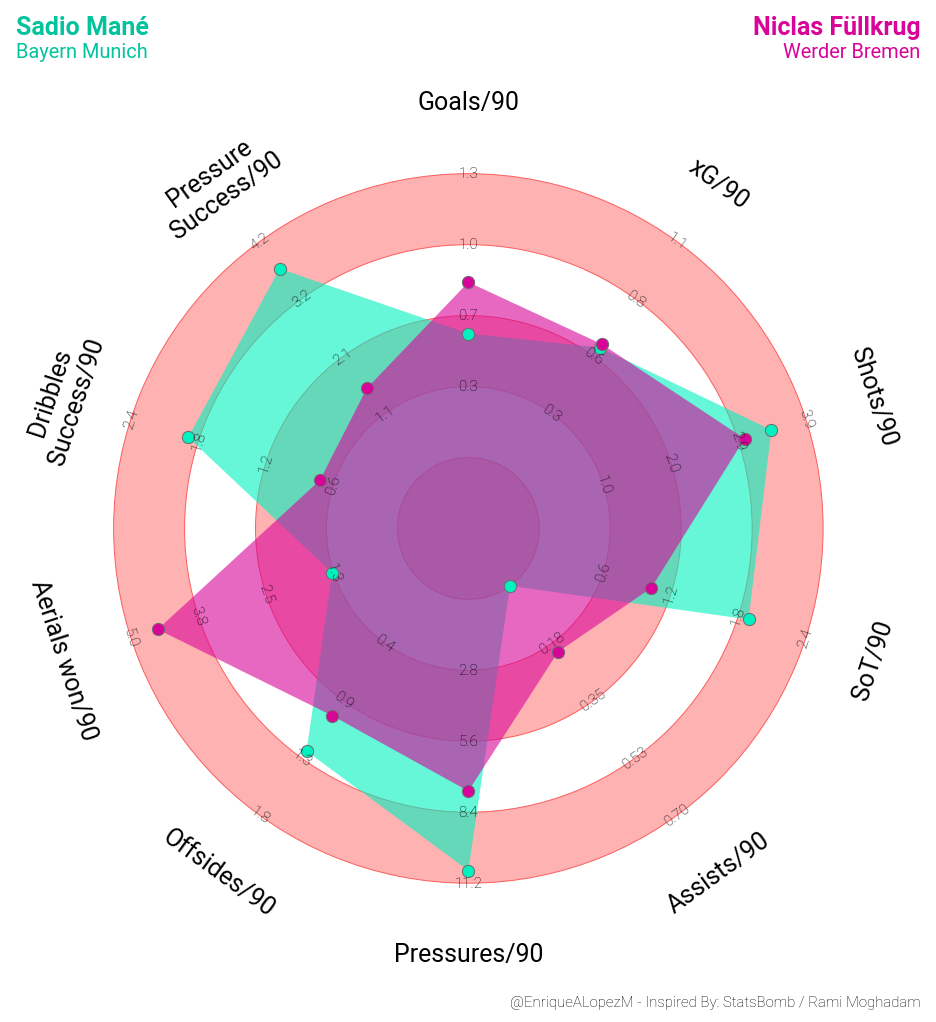

In [91]:
# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(p1_values, p2_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_regular.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, '@EnriqueALopezM - Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, player1, fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, team1, fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, player2, fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, team2, fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color='#d80499')
plt.savefig(f'{player1}{player2}.jpg',dpi=300)